In [185]:
#run any model in scikitlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge, ElasticNet,LinearRegression,LogisticRegression
from sklearn.svm import SVC,SVR,LinearSVR, LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
#from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering
#from scipy.cluster.hierarchy import dendrogram
#from scipy.cluster import hierarchy
#from sklearn.decomposition import PCA
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline,make_pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
df = pd.read_csv("density_xray.csv")

In [25]:
df.head(n=10)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
5,89.647973,2.499600
6,69.492733,2.385000
7,20.150520,2.500673
8,82.256337,2.700880
9,64.424802,2.220781


In [28]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

In [34]:
df=df.rename(columns={'Rebound Signal Strength nHz':'Signal','Rock Density kg/m3':'Density'})

<Axes: xlabel='Signal', ylabel='Density'>

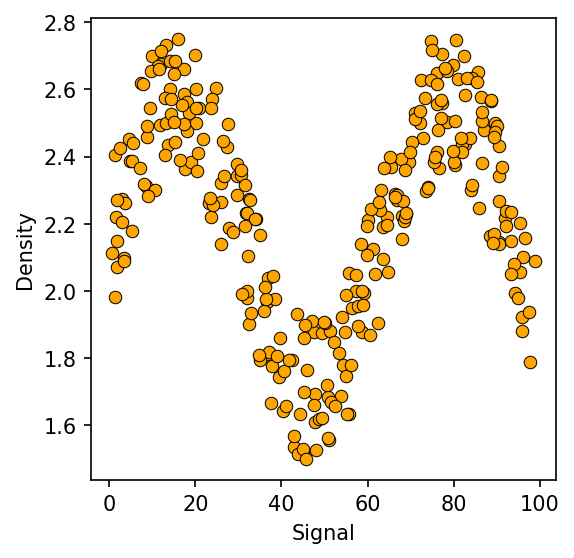

In [155]:
plt.figure(figsize=(4,4),dpi=150)
sns.scatterplot(x='Signal',y='Density',data=df,color='orange',marker='o',edgecolors='k')

In [62]:
#dependent/independent variable
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [65]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [136]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    plt.clf()
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(4,4),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [98]:
#model
model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors=n)
#model = DecisionTreeRegressor()
#model = GradientBoostingRegressor()

RMSE : 0.25700519971277386


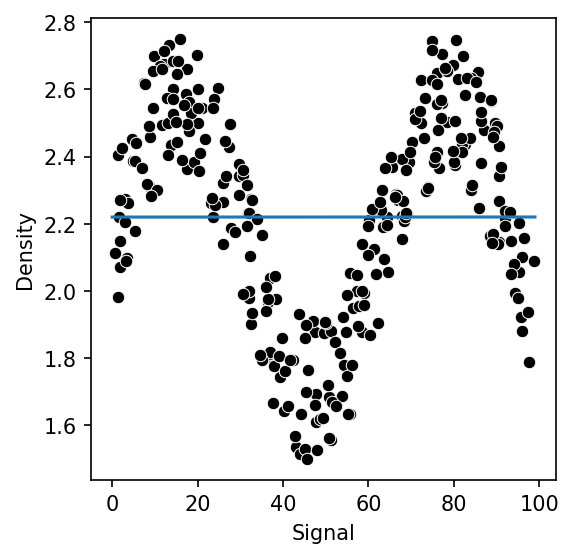

In [100]:
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1458863340395632


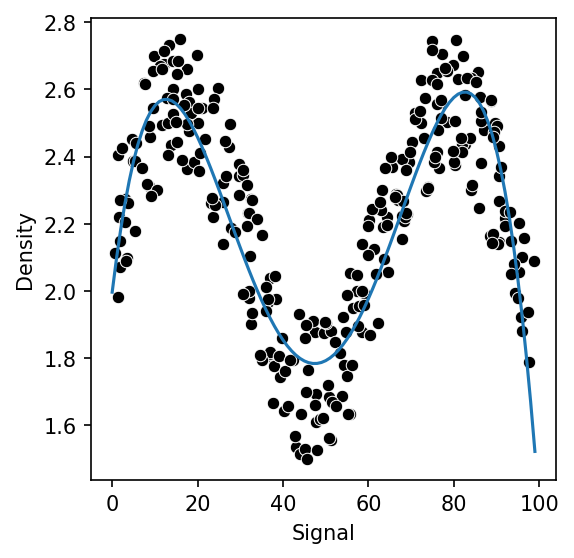

In [122]:
pipe = make_pipeline(PolynomialFeatures(4),model)
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1523487029481169
RMSE : 0.13277855735724958
RMSE : 0.13277855735724958


<Figure size 640x480 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

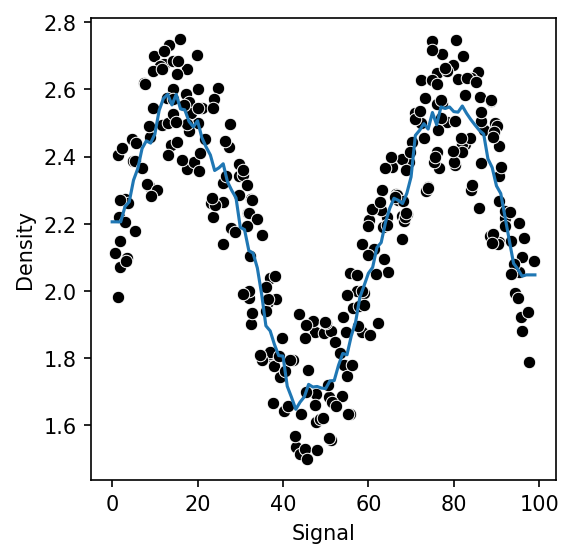

In [140]:
preds = {}
k_values = [1,10,10]
for n in k_values:    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.1523487029481169


<Figure size 640x480 with 0 Axes>

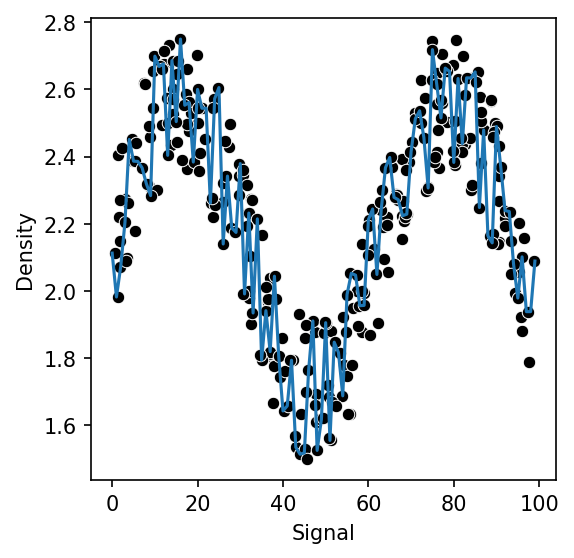

In [148]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.14426052205684387
RMSE : 0.1332655505865337
RMSE : 0.13662498381737928


<Figure size 640x480 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

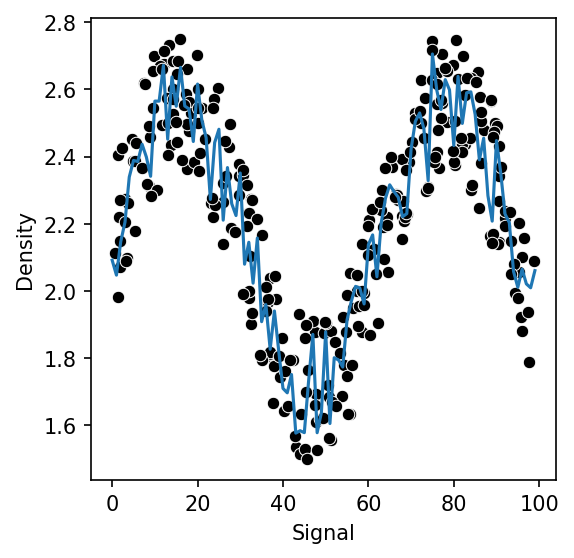

In [179]:
trees = [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)   
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13294148655066437


<Figure size 640x480 with 0 Axes>

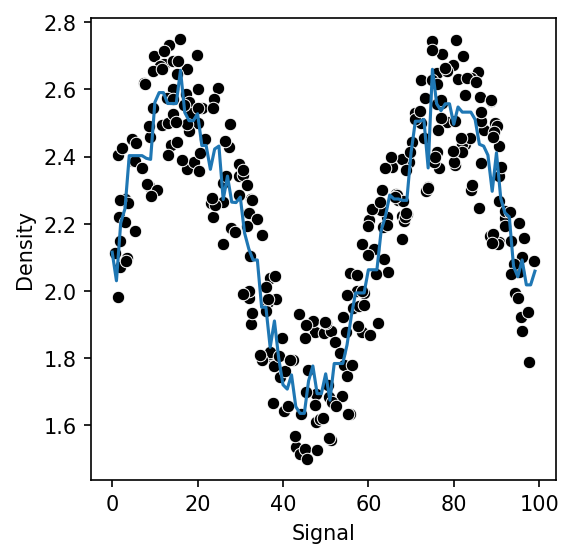

In [187]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [191]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [193]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12647964282173596


<Figure size 640x480 with 0 Axes>

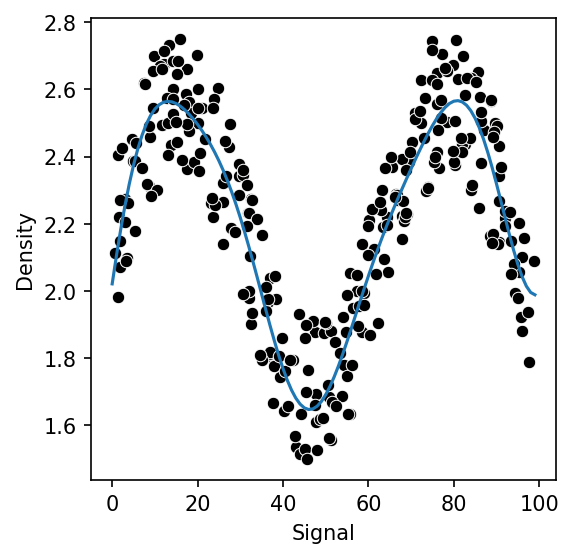

In [196]:
run_model(grid,X_train,y_train,X_test,y_test)